# *Assignment no 1*
## *Name - Kiran Shete*
## *Roll no - 33568*

# *Titanic Survived and Unsurvived Predection*
#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - -  - - - - - -- - - - - - - - -
## *Using Logistic Regression & Decision Tree*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install matplotlib
# !pip install seaborn
# !pip install missingno

## *Including the libaries*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
%matplotlib inline

## *Read the Data*

In [4]:
data = pd.read_csv("train.csv")


# *To show the top 5  columns of the dataframe* 


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## *To know the number of columns and rows*

In [6]:
data.shape

(891, 12)

## *Information  about DataFrame*

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## *Types of datatypes in dataframes*

In [8]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

## *To get the  Data columns*

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## *Getting the number of unique values in each column*

In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
a = len(data)
b = len(data[data['Survived'] == 1])
print("Total number of the passengers : ",a)
print("Total number of passenger who survived : ",b)

Total number of the passengers :  891
Total number of passenger who survived :  342


## *Total passenger survived*

In [12]:
print("passenger surived Percentage : ",round(b/a*100,2),"%")

passenger surived Percentage :  38.38 %


In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

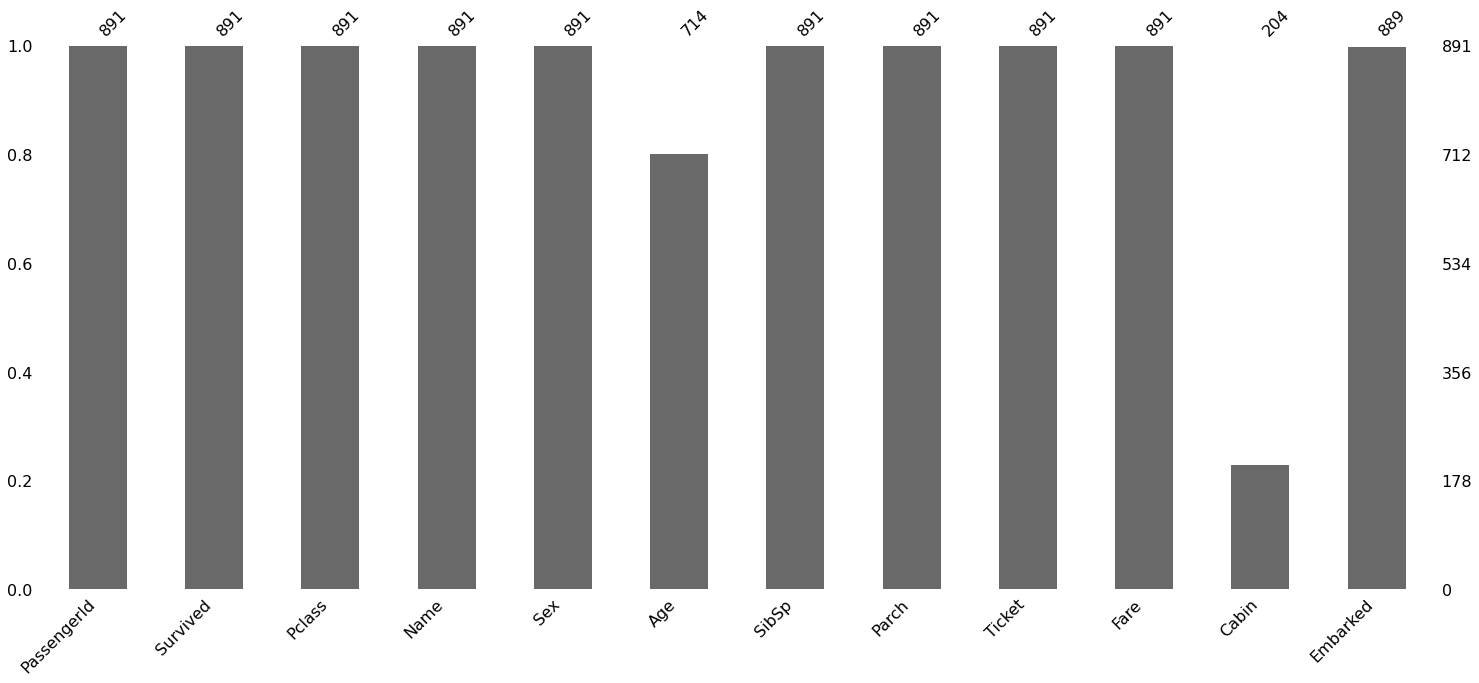

In [13]:
msno.bar(data)

In [17]:
#train data has 177 age nans
m = data['Age'].mean()
m

29.69911764705882

In [18]:
data['Age'] = data['Age'].replace(np.nan, 29)

In [ ]:
#next is cabin 
#Shows there is more than 60% of NA's for the column so we should drop it. Judging by .info()
data = data.drop(['Cabin'], axis=1)


In [19]:
#embarked on train data is only 2 nans
#embarked on test data is 0
data['Embarked'] = data['Embarked'].replace(np.nan, 'Q')

In [ ]:
#Check for na's
train_data.isna().sum()